<span style="font-family: Arial; font-size:2.8em;color:blue;"> </p> __Projet: Prévénir les catastrophes aeriennes.__

<span style="font-family: Arial; font-size:1.8em;color:green;"> </p> __Comment savoir Dans quel état le pilote est ? Va t-il ainsi entrainer un crash ?__

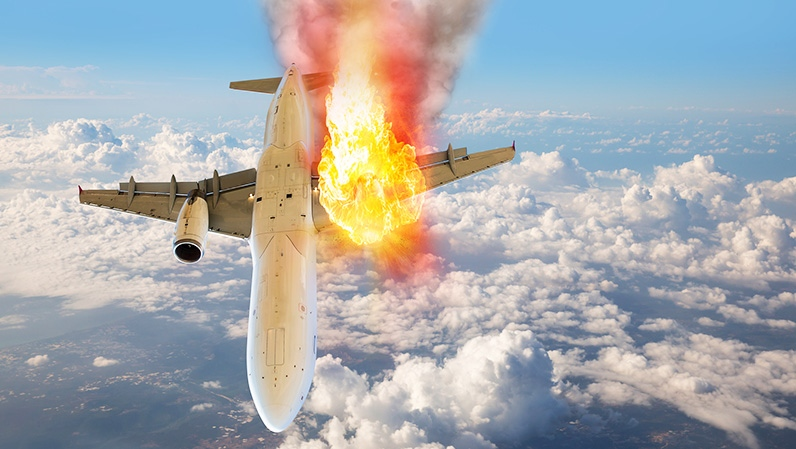

- La plupart des décès liés aux vols résultent d'une perte de «conscience de l'état de l'avion». Il s'agit d'une gestion de l'attention inefficace de la part des pilotes qui peuvent être distraits, somnolents ou dans d'autres états cognitifs dangereux.

- Mon défi consiste à créer un modèle pour détecter les événements troublants à partir des données physiologiques des équipages.  Avec ce modele , les pilotes pourraient alors être alertés lorsqu'ils entreraient dans un état troublant, évitant ainsi les accidents et sauvant des vies.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings 
warnings.filterwarnings("ignore")

In [2]:
Data=pd.read_csv("pilot.csv")

In [3]:
Data.head()

,crew,experiment,time,seat,eeg_fp1,eeg_f7,eeg_f8,eeg_t4,eeg_t6,eeg_t5,...,eeg_c4,eeg_p4,eeg_poz,eeg_c3,eeg_cz,eeg_o2,ecg,r,gsr,event
0,1,CA,0.011719,1,-5.28545,26.775801,-9.527310,-12.793200,16.717800,33.737499,...,37.368999,17.437599,19.201900,20.5968,-3.95115,14.507600,-4520.0,817.705994,388.829987,A
1,1,CA,0.015625,1,-2.42842,28.430901,-9.323510,-3.757230,15.969300,30.443600,...,31.170799,19.399700,19.689501,21.3547,1.33212,17.750200,-4520.0,817.705994,388.829987,A
2,1,CA,0.019531,1,10.67150,30.420200,15.350700,24.724001,16.143101,32.142799,...,-12.012600,19.396299,23.171700,22.4076,1.53786,22.247000,-4520.0,817.705994,388.829987,A
3,1,CA,0.023438,1,11.45250,25.609800,2.433080,12.412500,20.533300,31.494101,...,18.574100,23.156401,22.641199,19.3367,2.54492,18.998600,-4520.0,817.705994,388.829987,A
4,1,CA,0.027344,1,7.28321,25.942600,0.113564,5.748000,19.833599,28.753599,...,6.555440,22.754700,22.670300,20.2932,1.69962,22.812799,-4520.0,817.705994,388.829987,A


In [4]:
Data.columns

Index(['crew', 'experiment', 'time', 'seat', 'eeg_fp1', 'eeg_f7', 'eeg_f8',
       'eeg_t4', 'eeg_t6', 'eeg_t5', 'eeg_t3', 'eeg_fp2', 'eeg_o1', 'eeg_p3',
       'eeg_pz', 'eeg_f3', 'eeg_fz', 'eeg_f4', 'eeg_c4', 'eeg_p4', 'eeg_poz',
       'eeg_c3', 'eeg_cz', 'eeg_o2', 'ecg', 'r', 'gsr', 'event'],
      dtype='object')

<span style="font-family: Arial; font-size:1.4em;color:red;"> </p> __crew:__
- un identifiant unique pour une paire de pilotes. Il y a 9 équipages dans les données.

<span style="font-family: Arial; font-size:1.4em;color:red;"> </p> __time:__
- secondes dans l'expérience


<span style="font-family: Arial; font-size:1.4em;color:red;"> </p>__seat:__
- le pilote est-il assis à gauche (0) ou à droite (1)

<span style="font-family: Arial; font-size:1.4em;color:red;"> </p>__experiment :__
- Un de CA, DA, SS ou LOFT.



<span style="font-family: Arial; font-size:1.5em;color:green;"> </p> __Alors Notre Data Nous a fournie 4 parametres physiologiques principaux :__
- Respiration
- Electrocardiogram (ECG)
- Electroencephalogram (EEG)
- gsr

<span style="font-family: Arial; font-size:1.2em;color:red;"> </p> __R:__

- La respiration, une mesure de la montée et de la chute de la poitrine.

<span style="font-family: Arial; font-size:1.2em;color:red;"> </p>__ECG:__
- Ceci mesure l'activité électrique dans le coeur. Il s’agit d’un ECG à dérivation unique, utile pour analyser le rythme et la fréquence. Si une personne souffrait d'un problème cardiaque, elle serait plus susceptible de disposer d'un électrocardiogramme à 12 dérivations afin d'examiner l'état structurel de tout changement d'activité cardiaque.

<span style="font-family: Arial; font-size:1.2em;color:red;"> </p> __EEG:__

- Maintenant, c'est la partie intéressante pour moi. Le rôle de l'EEG a été largement surestimé au fil des ans, et ce n'est certainement pas une panacée pour l'activité cérébrale. Cliniquement, il est utile de savoir si une personne est éveillée, endormie, mort cérébrale, a une crise convulsive et quelques autres choses. L'EEG est la somme de toute l'activité électrique à la surface du cerveau.

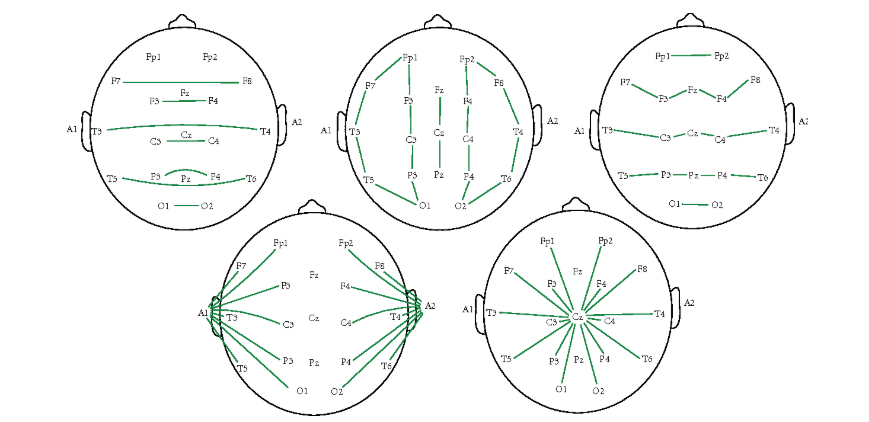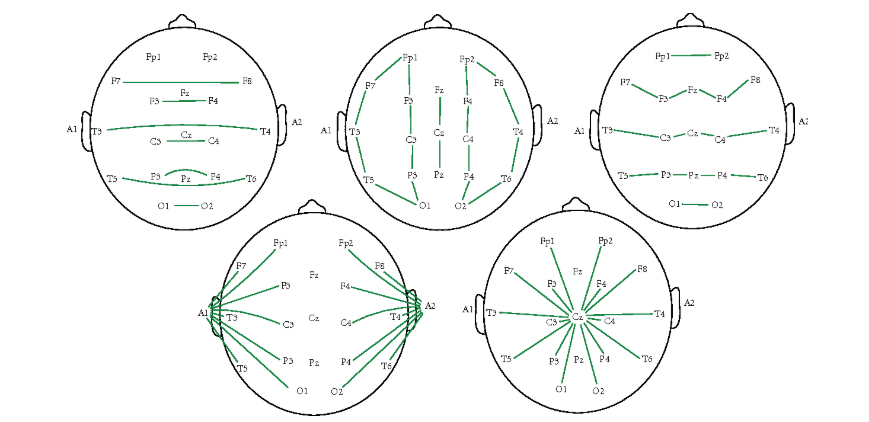

<span style="font-family: Arial; font-size:1.2em;color:red;"> </p>__gsr :__
- Réponse galvanique de la peau, une mesure de l'activité électrodermale.

<span style="font-family: Arial; font-size:1.5em;color:green;"> </p> __Les pilotes ont expérimenté des distractions destinées à induire l’un des trois états cognitifs suivants:__

- L'attention canalisée (AC) est, grosso modo, le fait d'être concentré sur une tâche à l'exclusion de toutes les autres. Cela est induit dans l’analyse comparative par le fait que les sujets jouent un jeu vidéo captivant basé sur un puzzle.
- L’attention détournée (AD) est l’état d’avoir son attention détournée par des actions ou des processus de pensée associés à une décision. Ceci est induit par le fait que les sujets effectuent une tâche de surveillance d'affichage. Périodiquement, un problème de mathématique apparaissait qu'il fallait résoudre avant de retourner à la tâche de surveillance.
- La surprise ou le sursaut (SS) est provoquée par le fait que les sujets regardent des clips avec des craintes de saut.


<span style="font-family: Arial; font-size:1.5em;color:green;"> </p>__Les échantillons sont étiquetés de la manière suivante:__

- A = base
- B = SS
- C = CA
- D = DA

<span style="font-family: Arial; font-size:1.2em;color:red;"> </p> __event :__
- Etat du pilote à l'heure donnée: un de A = base, B = SS, C = CA, D = DA

<span style="font-family: Arial; font-size:1.8em;color:blue;">__Decouvrir La Data__

In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4867421 entries, 0 to 4867420
Data columns (total 28 columns):
crew          int64
experiment    object
time          float64
seat          int64
eeg_fp1       float64
eeg_f7        float64
eeg_f8        float64
eeg_t4        float64
eeg_t6        float64
eeg_t5        float64
eeg_t3        float64
eeg_fp2       float64
eeg_o1        float64
eeg_p3        float64
eeg_pz        float64
eeg_f3        float64
eeg_fz        float64
eeg_f4        float64
eeg_c4        float64
eeg_p4        float64
eeg_poz       float64
eeg_c3        float64
eeg_cz        float64
eeg_o2        float64
ecg           float64
r             float64
gsr           float64
event         object
dtypes: float64(24), int64(2), object(2)
memory usage: 1.0+ GB


In [6]:
Data.describe()

,crew,time,seat,eeg_fp1,eeg_f7,eeg_f8,eeg_t4,eeg_t6,eeg_t5,eeg_t3,...,eeg_f4,eeg_c4,eeg_p4,eeg_poz,eeg_c3,eeg_cz,eeg_o2,ecg,r,gsr
count,4.867421e+06,4.867421e+06,4.867421e+06,4.867421e+06,4.867421e+06,4.867421e+06,4.867421e+06,4.867421e+06,4.867421e+06,4.867421e+06,...,4.867421e+06,4.867421e+06,4.867421e+06,4.867421e+06,4.867421e+06,4.867421e+06,4.867421e+06,4.867421e+06,4.867421e+06,4.867421e+06
mean,5.538783e+00,1.782358e+02,4.999531e-01,3.746336e+00,1.360002e+00,1.213644e+00,7.350926e-02,7.845481e-02,8.675488e-02,2.299909e-01,...,1.208597e+00,6.050047e-01,2.413972e-01,1.947635e-01,6.243715e-01,4.429119e-01,2.393738e-01,5.285460e+03,7.376090e+02,8.518467e+02
std,3.409353e+00,1.039592e+02,5.000000e-01,4.506763e+01,3.518923e+01,3.519242e+01,2.431472e+01,1.803932e+01,1.832606e+01,2.531132e+01,...,4.205516e+01,2.052105e+01,1.660196e+01,1.833801e+01,1.975695e+01,1.974815e+01,2.351859e+01,1.214126e+04,8.187979e+01,5.039324e+02
min,1.000000e+00,3.000000e-03,0.000000e+00,-1.361360e+03,-1.581330e+03,-1.643950e+03,-1.516640e+03,-1.220510e+03,-1.266430e+03,-1.279940e+03,...,-2.333830e+03,-1.212030e+03,-1.228030e+03,-1.229130e+03,-1.230480e+03,-6.962790e+02,-1.176370e+03,-1.858570e+04,4.820600e+02,0.000000e+00
25%,3.000000e+00,8.808100e+01,0.000000e+00,-9.200250e+00,-8.325150e+00,-8.767610e+00,-7.367240e+00,-6.102000e+00,-6.007260e+00,-6.904030e+00,...,-9.306430e+00,-7.495970e+00,-6.713860e+00,-6.774840e+00,-7.161160e+00,-7.817650e+00,-6.526950e+00,-2.550070e+03,6.631430e+02,5.241140e+02
50%,5.000000e+00,1.769297e+02,0.000000e+00,3.819020e-01,4.264100e-02,1.140390e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,5.667500e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.920510e+03,7.434380e+02,7.701970e+02
75%,7.000000e+00,2.683398e+02,1.000000e+00,1.030610e+01,8.753340e+00,9.282560e+00,7.437780e+00,6.176630e+00,6.086460e+00,7.071460e+00,...,9.775770e+00,7.765670e+00,6.831320e+00,6.905020e+00,7.466520e+00,8.025190e+00,6.615180e+00,1.029010e+04,8.134120e+02,1.197120e+03
max,1.300000e+01,3.603711e+02,1.000000e+00,1.972240e+03,2.048790e+03,2.145710e+03,1.731880e+03,9.009370e+02,1.176540e+03,1.514820e+03,...,2.034170e+03,8.917290e+02,9.080890e+02,1.435800e+03,9.284070e+02,6.136690e+02,2.443550e+03,3.418830e+04,8.401840e+02,1.999860e+03


In [7]:
Data.isnull().sum()

crew          0
experiment    0
time          0
seat          0
eeg_fp1       0
eeg_f7        0
eeg_f8        0
eeg_t4        0
eeg_t6        0
eeg_t5        0
eeg_t3        0
eeg_fp2       0
eeg_o1        0
eeg_p3        0
eeg_pz        0
eeg_f3        0
eeg_fz        0
eeg_f4        0
eeg_c4        0
eeg_p4        0
eeg_poz       0
eeg_c3        0
eeg_cz        0
eeg_o2        0
ecg           0
r             0
gsr           0
event         0
dtype: int64

<span style="font-family: Arial; font-size:1.8em;color:blue;">__Visualisation et Preprocessing de La Data__

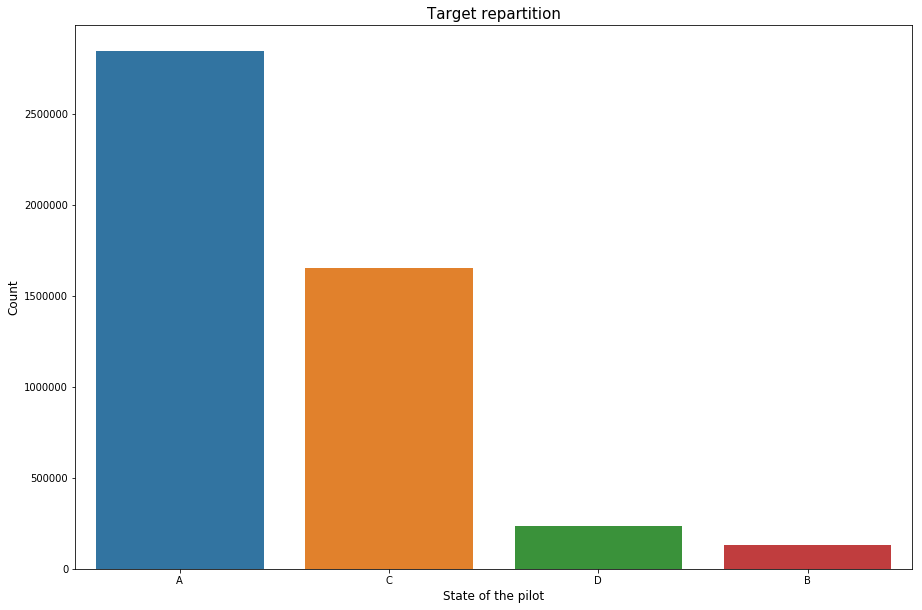

In [8]:
plt.figure(figsize=(15,10))
sns.countplot(Data['event'])
plt.xlabel("State of the pilot", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Target repartition", fontsize=15)
plt.show()

- On peut Voir ici que Generalement l'etat des Pilote est stable (l'etat de Base d'un humain). vient en deuxieme place l'etat de l'attention canalisé et en derniere place l'etat de la surprise ce qui est tres logique et assez Rassurant . 

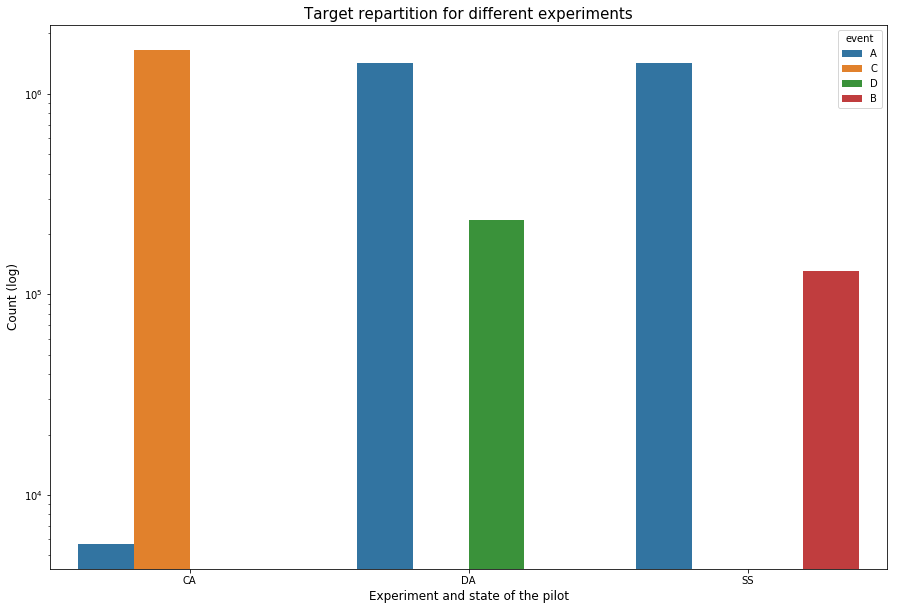

In [9]:
plt.figure(figsize=(15,10))
sns.countplot('experiment', hue='event', data=Data)
plt.xlabel("Experiment and state of the pilot", fontsize=12)
plt.ylabel("Count (log)", fontsize=12)
plt.yscale('log')
plt.title("Target repartition for different experiments", fontsize=15)
plt.show()

- On peut constater ici que dans l'experience de la CA la plus part des pilotes ont devouée leurs attentions ce qui est tres Bien par contre soumis aux autres experiences il ya une certaine majorité qui n'as pas été affecté ce qui nous servent bien dans ces cas la vu que c'est des états a risque.

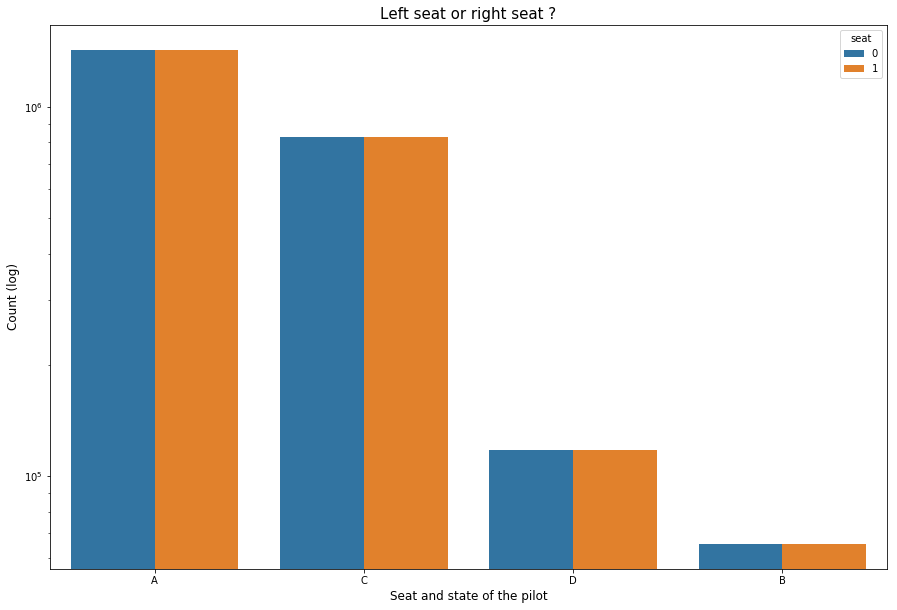

In [10]:
plt.figure(figsize=(15,10))
sns.countplot('event', hue='seat', data=Data)
plt.xlabel("Seat and state of the pilot", fontsize=12)
plt.ylabel("Count (log)", fontsize=12)
plt.yscale('log')
plt.title("Left seat or right seat ?", fontsize=15)
plt.show()

- On peut Voir dans ce graph que quelques soit le seat du pilote cela ne change absolument rien et n'as rien avoir avec les experiences et les resultats qu'on a obtenu.


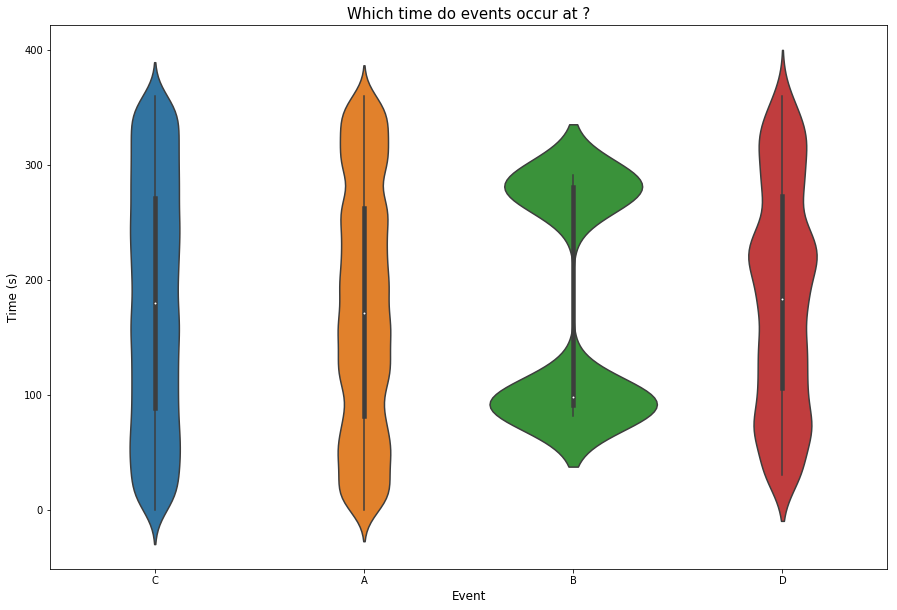

In [11]:
plt.figure(figsize=(15,10))
sns.violinplot(x='event', y='time', data=Data.sample(50000))
plt.ylabel("Time (s)", fontsize=12)
plt.xlabel("Event", fontsize=12)
plt.title("Which time do events occur at ?", fontsize=15)
plt.show()

- on peut voir et constater ici que l'evenement c'est a dire la reaction de notre Pilote est generalement bien repartie dans le temps a part pour l'etat de la surprise donc cela peut nous aider et etre un facteur de determination de l'etat de surprise .

In [12]:
eeg_features = ["eeg_fp1", "eeg_f7", "eeg_f8", "eeg_t4", "eeg_t6", "eeg_t5", "eeg_t3", "eeg_fp2", "eeg_o1", "eeg_p3", "eeg_pz", "eeg_f3", "eeg_fz", "eeg_f4", "eeg_c4", "eeg_p4", "eeg_poz", "eeg_c3", "eeg_cz", "eeg_o2"]

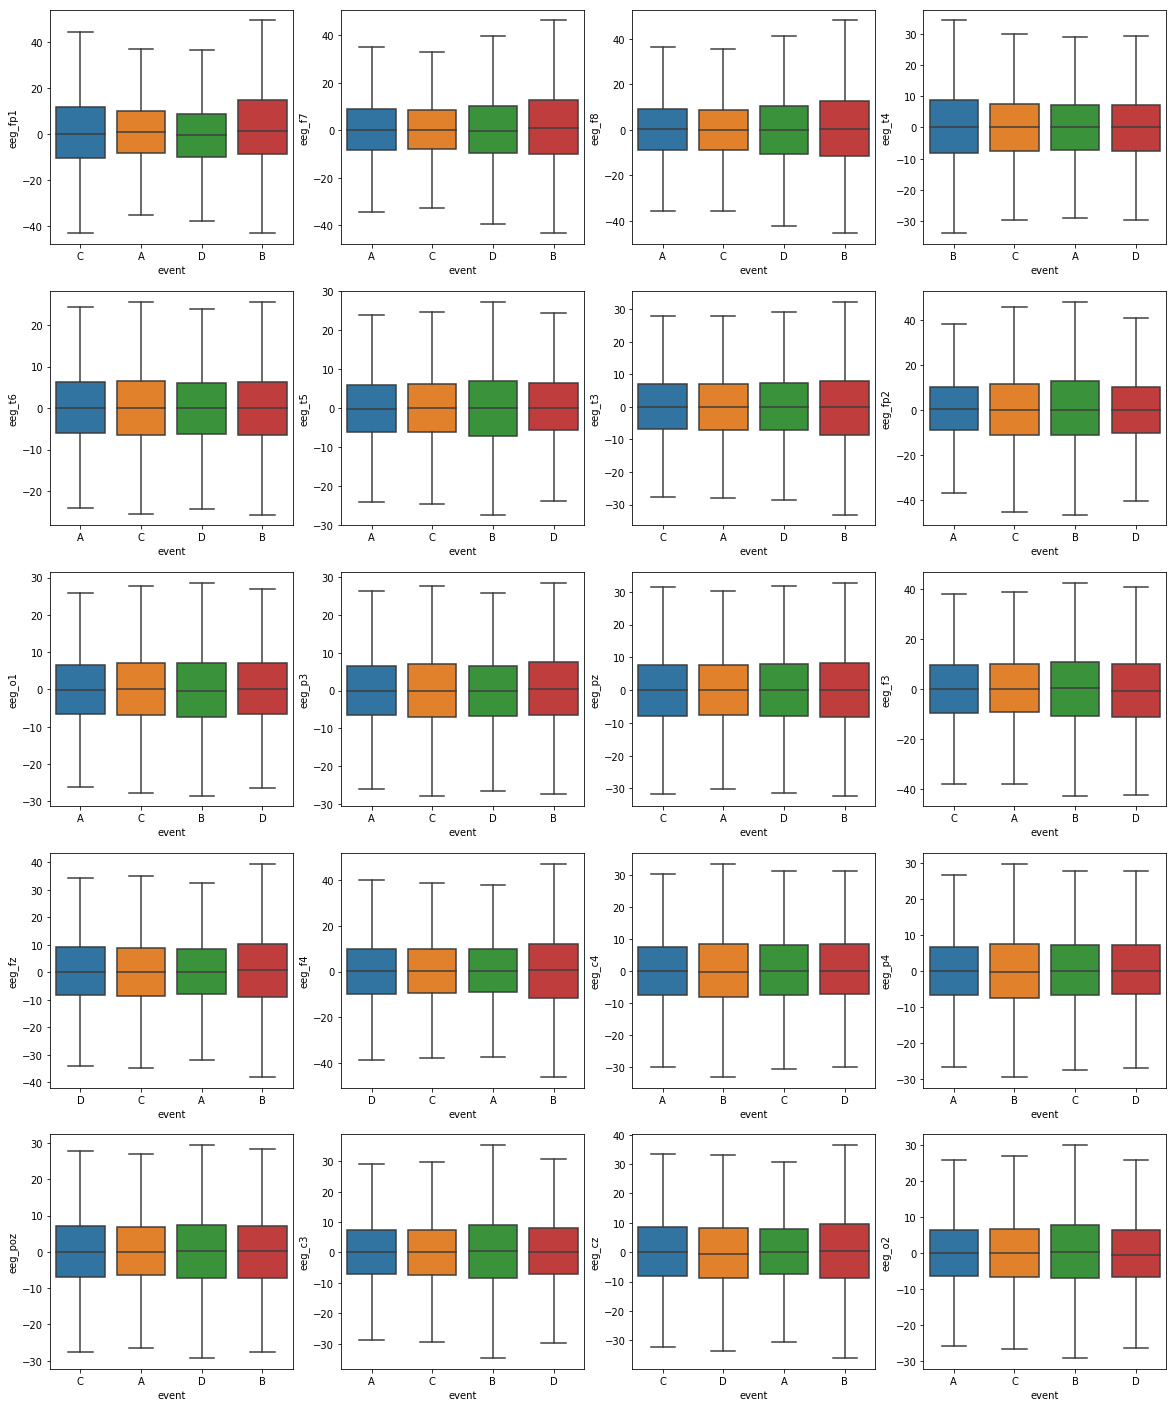

In [13]:
plt.figure(figsize=(20,25))
i = 0

for egg in eeg_features:
    i += 1
    plt.subplot(5, 4, i)
    sns.boxplot(x='event', y=egg, data=Data.sample(50000), showfliers=False)

plt.show()

- on voudrait ici voir la distribution de nos features eeg et on constate bien que ils sont presque dans les memes valeurs donc ils vont pas nous causer de problemes . 


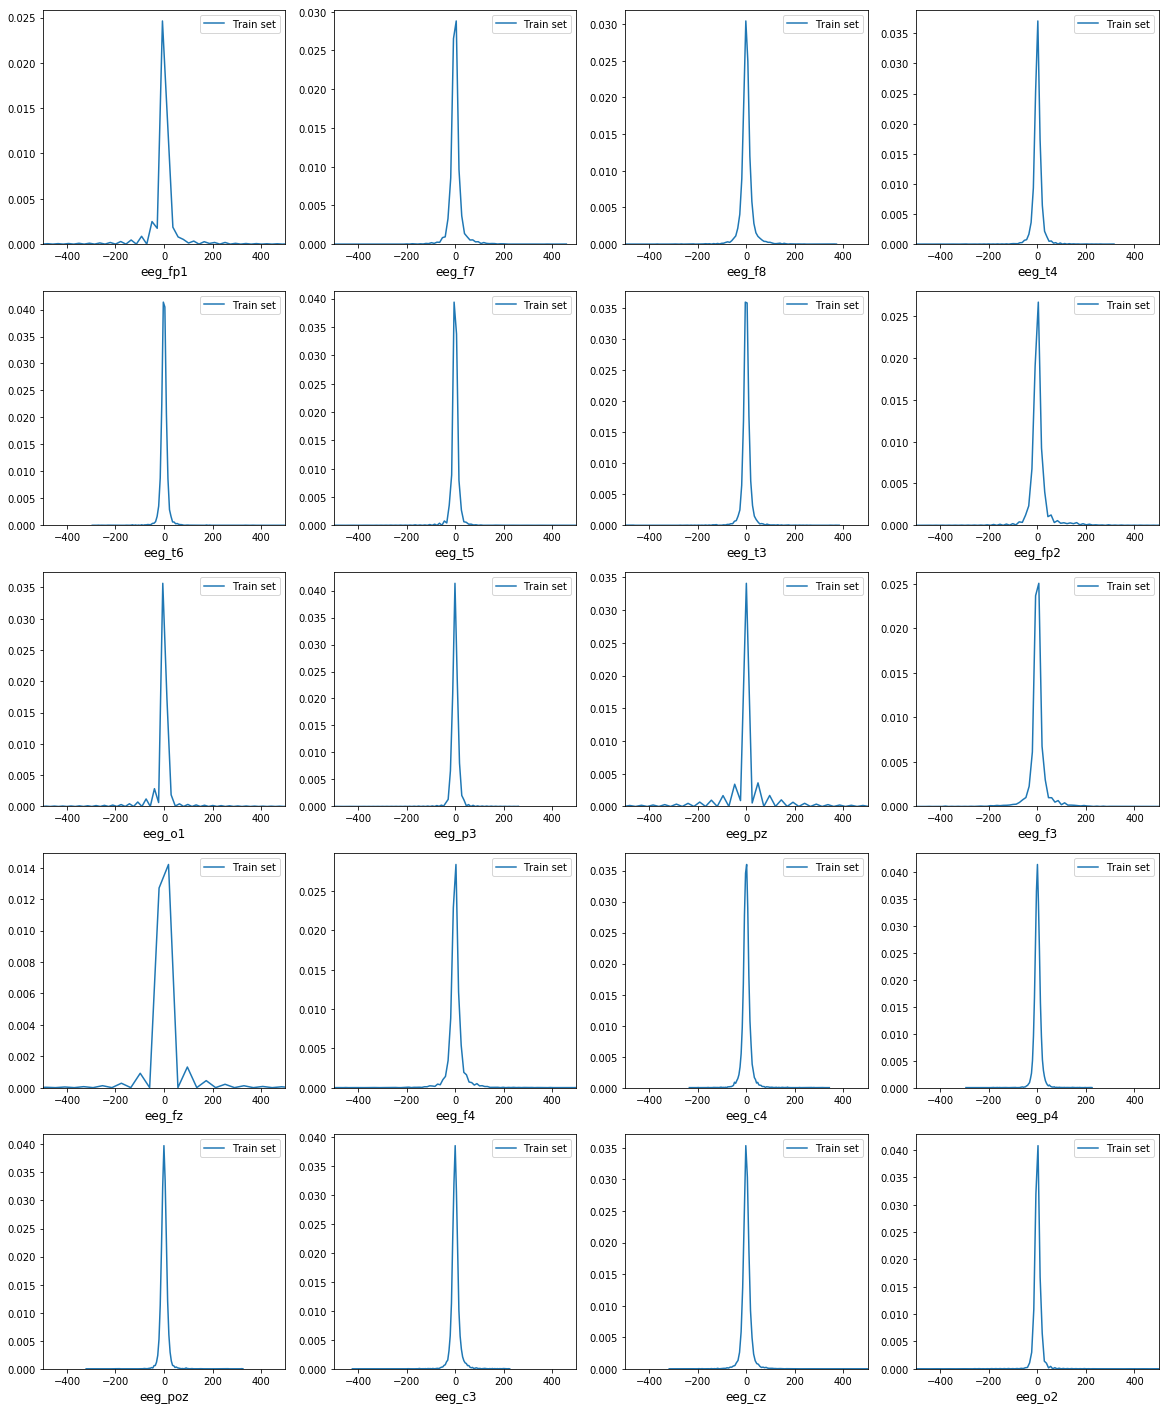

In [14]:
plt.figure(figsize=(20,25))
plt.title('Eeg features distributions')
i = 0

for eeg in eeg_features:
    i += 1
    plt.subplot(5, 4, i)
    sns.distplot(Data.sample(10000)[eeg], label='Train set', hist=False)
    plt.xlim((-500, 500))
    plt.legend()
    plt.xlabel(eeg, fontsize=12)

plt.show()

- On peut bien Voir ici que nos eeg sont assez correler voyons le pic qui surgit dans tous les graphs de tous ses parametres .

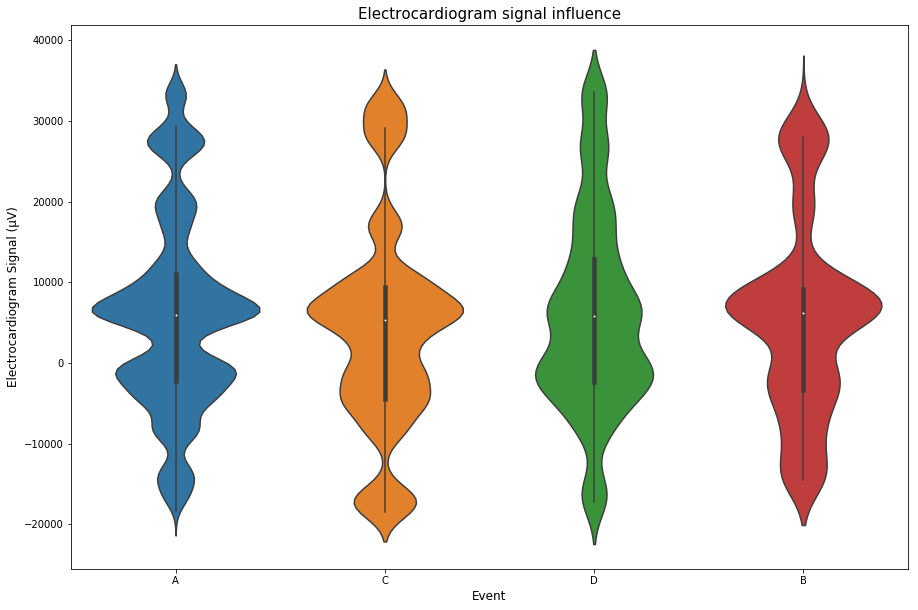

In [15]:
plt.figure(figsize=(15,10))
sns.violinplot(x='event', y='ecg', data=Data.sample(50000))
plt.ylabel("Electrocardiogram Signal (µV)", fontsize=12)
plt.xlabel("Event", fontsize=12)
plt.title("Electrocardiogram signal influence", fontsize=15)
plt.show()


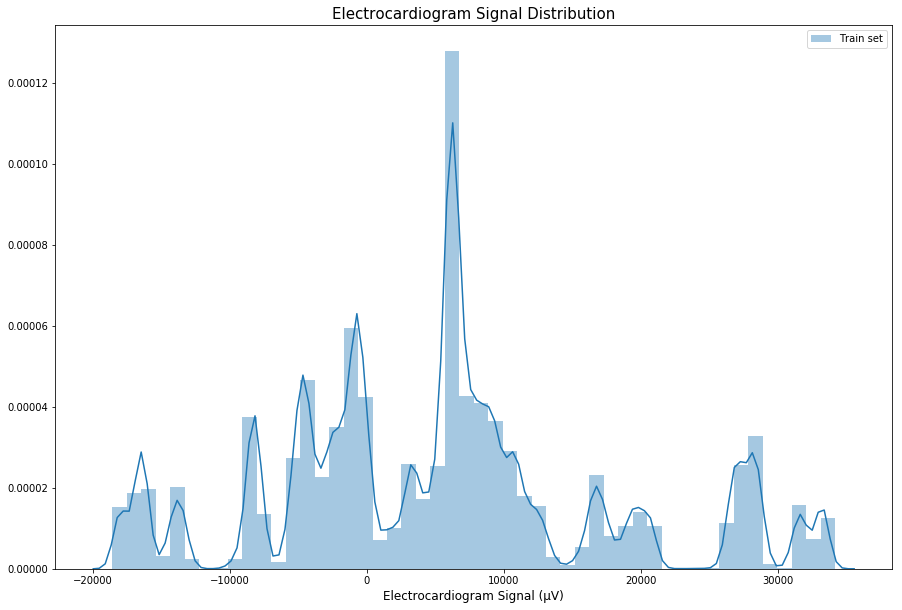

In [16]:
plt.figure(figsize=(15,10))
sns.distplot(Data['ecg'], label='Train set')
plt.legend()
plt.xlabel("Electrocardiogram Signal (µV)", fontsize=12)
plt.title("Electrocardiogram Signal Distribution", fontsize=15)
plt.show()

- on peut constater qu'au niveau de l'attention non canalisée on voit une certaine difference ce qui montre que la mesure cardiaque serait ainsi un bon indicateur.
- la data est assez bien repartie ce qui nous aiderait apres pour ne pas avoir des resultat biaiser.

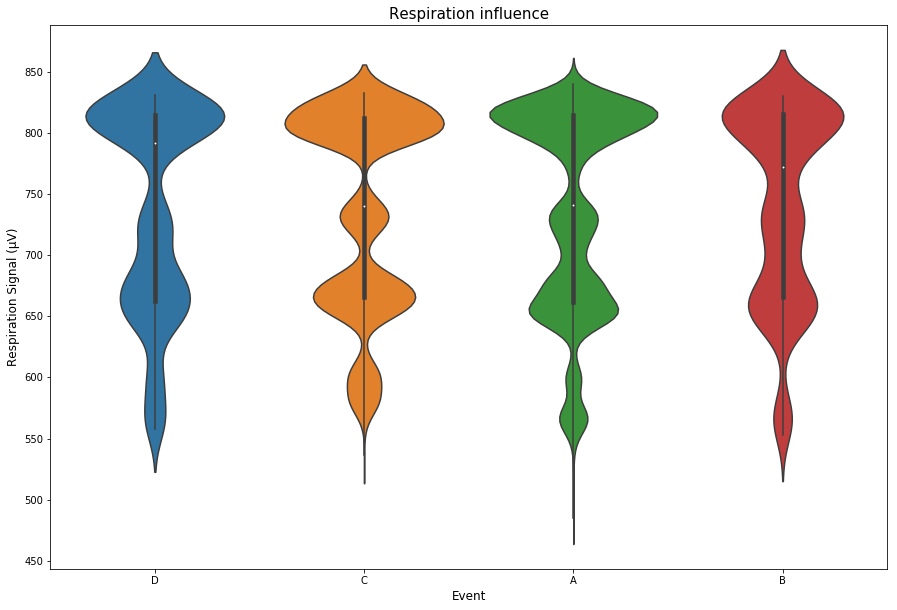

In [17]:
plt.figure(figsize=(15,10))
sns.violinplot(x='event', y='r', data=Data.sample(50000))
plt.ylabel("Respiration Signal (µV)", fontsize=12)
plt.xlabel("Event", fontsize=12)
plt.title("Respiration influence", fontsize=15)
plt.show()

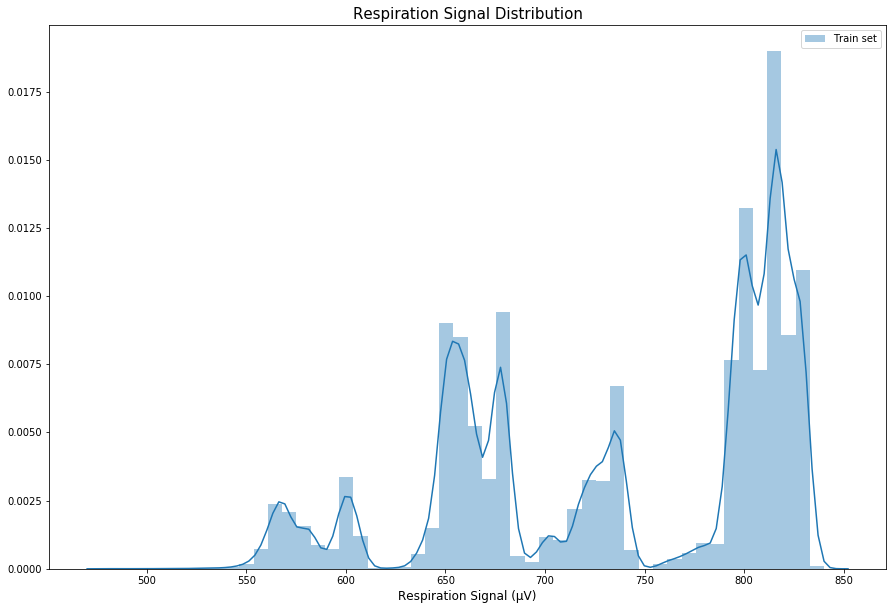

In [18]:
plt.figure(figsize=(15,10))
sns.distplot(Data['r'], label='Train set')
plt.legend()
plt.xlabel("Respiration Signal (µV)", fontsize=12)
plt.title("Respiration Signal Distribution", fontsize=15)
plt.show()

- on peut constater qu'au niveau de la surprise la respiration est la plus saccager ce qui montre que la respiration ce qui est tres logique elle serait ainsi un bon indicateur.
- la data est assez bien repartie ce qui nous aiderait apres pour ne pas avoir des resultat biaiser.

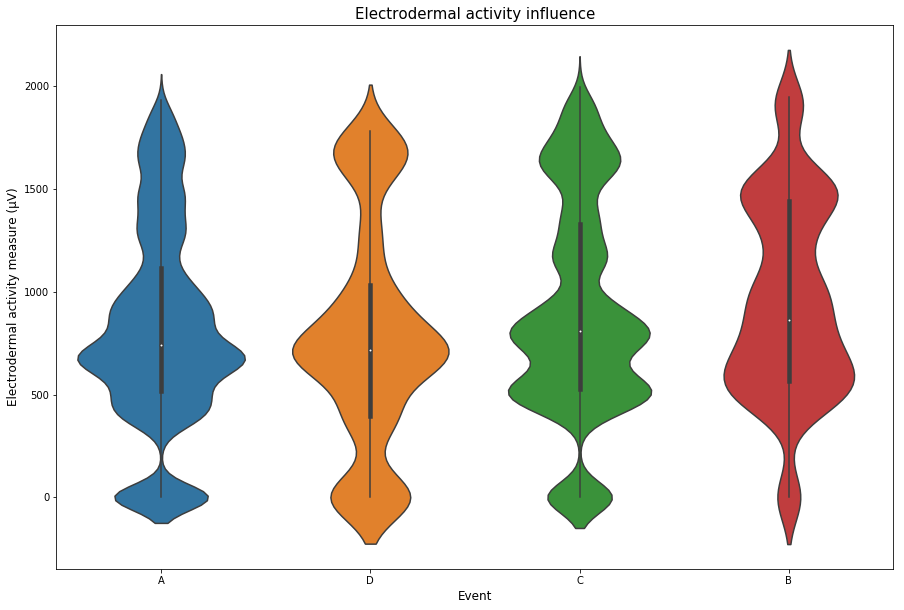

In [19]:
plt.figure(figsize=(15,10))
sns.violinplot(x='event', y='gsr', data=Data.sample(50000))
plt.ylabel("Electrodermal activity measure (µV)", fontsize=12)
plt.xlabel("Event", fontsize=12)
plt.title("Electrodermal activity influence", fontsize=15)
plt.show()

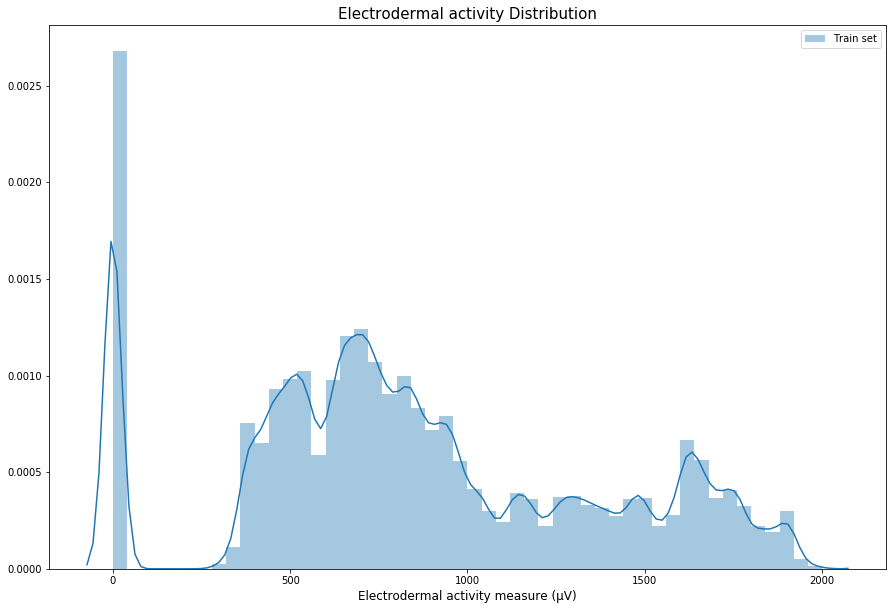

In [20]:
plt.figure(figsize=(15,10))
sns.distplot(Data['gsr'], label='Train set')
plt.legend()
plt.xlabel("Electrodermal activity measure (µV)", fontsize=12)
plt.title("Electrodermal activity Distribution", fontsize=15)
plt.show()

- on peut constater qu'au niveau de la surprise la secretion galvanique de la peau est la plus importante ce qui montre que elle serait ainsi un bon indicateur.
- la data est assez bien repartie ce qui nous aiderait apres pour ne pas avoir des resultat biaiser.

In [21]:
dic = {'A': 0, 'B': 1, 'C': 2, 'D': 3}
dic1 = {'CA':0,'DA':1,'SS':2,'LOFT':3}
Data["event"] = Data["event"].apply(lambda x: dic[x])
Data["event"] = Data["event"].astype('int8')
Data['experiment'] = Data['experiment'].apply(lambda x: dic1[x])
Data['experiment'] =Data['experiment'].astype('int8')


In [22]:
Data= Data.set_index(['crew', 'seat', 'experiment'])

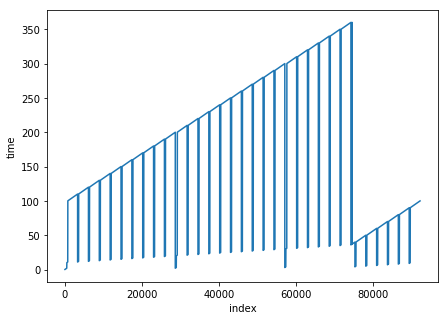

In [23]:
pilot = Data.loc[1, 0]
plt.figure(figsize=(7,5))
plt.plot(range(len(pilot.loc[0])), pilot.loc[0].time)
plt.xlabel('index')
plt.ylabel('time')
plt.show()

- On peut remarquer ici que la colonne du temps n'est pas bien organiser chez les pilote ce qui ne serait pas bien dans nos predictions ca serait alors mieux de le regler . 

In [24]:
Data = Data.sort_values(by='time').sort_index()
pilot = Data.loc[1, 0]

In [25]:
event_colors = {0: 'green', 1: 'blue', 2: 'red', -1: 'gray'}

def plot_ts(pilot_data, features, exp=0):
    exp_data = pilot_data.loc[exp]
    
    ax = exp_data.plot(
         kind='line',
         x='time', 
         y=features, 
         figsize=(15,5), 
         linewidth=2.
    )
    changes = exp_data[exp_data.event.diff().abs()>0][['time', 'event']].values
    times = [0] + list(changes[:, 0]) + [exp_data.time.max()]
    events = [exp_data.event.iloc[0]] + list(changes[:, 1])
    for i in range(len(times)-1):
        event = events[i]
        ax.axvspan(times[i], times[i+1], facecolor=event_colors[event], alpha=0.1)
    
    plt.show()


<span style="font-family: Arial; font-size:1.8em;color:green;"> </p> __Suivre l'evolution des parametres Physiologique d'un Pilote:__

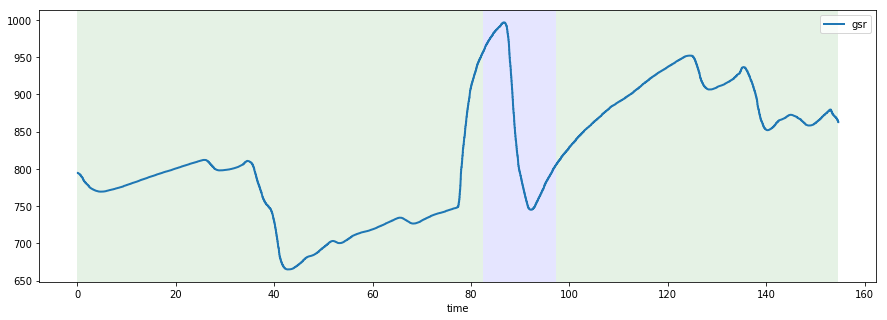

In [26]:
plot_ts(pilot_data=pilot, features='gsr', exp=2)

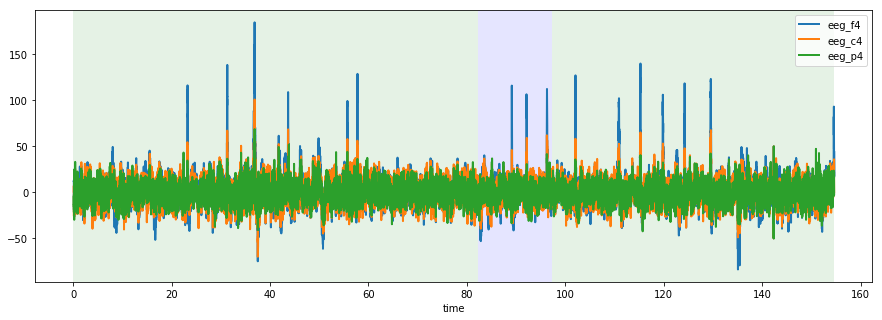

In [27]:
f = ['eeg_f4', 'eeg_c4', 'eeg_p4']
plot_ts(pilot_data=pilot, features=f, exp=2)

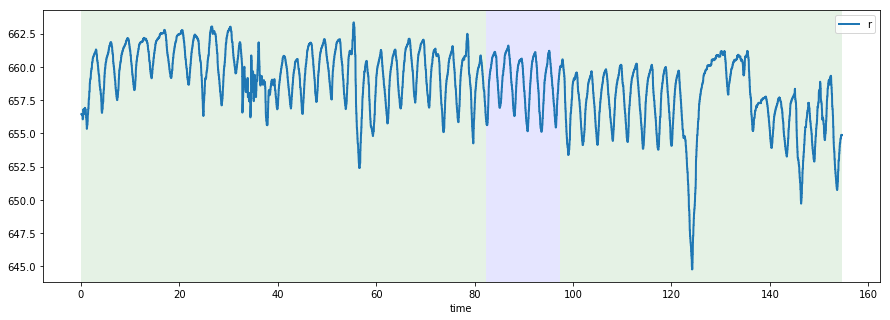

In [28]:
f = ['r']
plot_ts(pilot_data=pilot, features=f, exp=2)

- Pour confirmer nos dires precedents on a voulu voir l'evolution de tous ces parametres sur un Pilote de choix et on constate que quand soumis a ses experiences le pilote va montrer une certaine montée et descente ce qui nous pousse a prendre ces parametres en consideration. 

In [29]:
features_n = ["eeg_fp1", "eeg_f7", "eeg_f8", "eeg_t4", "eeg_t6", "eeg_t5", "eeg_t3", "eeg_fp2", "eeg_o1", "eeg_p3", "eeg_pz", "eeg_f3", "eeg_fz", "eeg_f4", "eeg_c4", "eeg_p4", "eeg_poz", "eeg_c3", "eeg_cz", "eeg_o2", "ecg", "r", "gsr"]

In [30]:
Data= Data.reset_index(['crew', 'seat', 'experiment'])

<span style="font-family: Arial; font-size:1.8em;color:green;"> </p> __Normalisation et standarisation de nos Valeurs__

In [31]:
Data['pilot'] = 100 * Data['seat'] + Data['crew']
Data['pilot'] = 100 * Data['seat'] + Data['crew']

print("Number of pilots : ", len(Data['pilot'].unique()))

Number of pilots :  18


In [32]:
from sklearn.preprocessing import MinMaxScaler


In [33]:
def normalize_by_pilots(df):
    pilots = Data["pilot"].unique()
    for pilot in pilots:
        ids = Data[Data["pilot"] == pilot].index
        scaler = MinMaxScaler()
        Data.loc[ids, features_n] = scaler.fit_transform(Data.loc[ids, features_n])
        
    return Data

In [34]:
Data = normalize_by_pilots(Data)

In [35]:
X=Data[['crew', 'experiment', 'time', 'seat', 'eeg_fp1', 'eeg_f7', 'eeg_f8',
       'eeg_t4', 'eeg_t6', 'eeg_t5', 'eeg_t3', 'eeg_fp2', 'eeg_o1', 'eeg_p3',
       'eeg_pz', 'eeg_f3', 'eeg_fz', 'eeg_f4', 'eeg_c4', 'eeg_p4', 'eeg_poz',
       'eeg_c3', 'eeg_cz', 'eeg_o2', 'ecg', 'r', 'gsr',]]
Y=Data[['event']]

<span style="font-family: Arial; font-size:1.8em;color:blue;">__Predictions and Evaluations__

In [36]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


<span style="font-family: Arial; font-size:1.2em;color:pink;"> </p>__Decision Tree__

In [43]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

dt_clf = DecisionTreeClassifier(max_depth=10)
dt_clf.fit(X_train, Y_train)
results = dt_clf.predict(X_test)
print(metrics.accuracy_score(Y_test, results))

0.9609095158117485


<span style="font-family: Arial; font-size:1.2em;color:pink;"> </p>__Random Forest__

In [52]:
from sklearn.model_selection import cross_val_score
from sklearn.cross_validation import ShuffleSplit
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf_clf, X, Y , scoring='accuracy')
print('Accuracy: {:.4f} (+/- {:.2f})'.format(scores.mean(), scores.std()))

Accuracy: 0.8904 (+/- 0.00)


<span style="font-family: Arial; font-size:1.2em;color:pink;"> </p>__Gradient Boost__

In [55]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators=100)
scores = cross_val_score(gb_clf, X, Y, scoring='accuracy')
print('Accuracy: {:.4f} (+/- {:.2f})'.format(scores.mean(), scores.std()))

Accuracy: 0.9493 (+/- 0.00)
